## Initialization

In [328]:
best_result = 10e6

### Data Processing

In [329]:
import pandas as pd
import numpy as np
from numpy import array

Raw_Cities_Distance = pd.read_excel('Korea-Distance.xlsx', index_col=0)
Raw_Cities_Distance = Raw_Cities_Distance.fillna(0)
# Sometimes, there's a bug to exclude index column of xlsx files during reading,
# even adding the 'index_col = None' statement.

Raw_Cities_Distance


,Incheon,Seoul,Busan,Daegu,Daejeon,Gwangju,Suwon-si,Ulsan,Jeonju,Cheongju-si,Changwon,Jeju-si,Chuncheon,Hongsung,Muan
Incheon,0.0,27.0,335.0,244.0,141.0,257.0,33.0,316.0,186.0,115.0,304.0,439.0,102.0,95.0,275.0
Seoul,27.0,0.0,330.0,237.0,144.0,268.0,31.0,307.0,195.0,113.0,301.0,453.0,75.0,111.0,290.0
Busan,335.0,330.0,0.0,95.0,199.0,193.0,304.0,54.0,189.0,221.0,35.0,291.0,330.0,271.0,233.0
Daegu,244.0,237.0,95.0,0.0,117.0,171.0,212.0,75.0,130.0,130.0,72.0,324.0,236.0,191.0,215.0
Daejeon,141.0,144.0,199.0,117.0,0.0,137.0,114.0,192.0,61.0,36.0,167.0,323.0,175.0,74.0,171.0
Gwangju,257.0,268.0,193.0,171.0,137.0,0.0,238.0,222.0,77.0,173.0,161.0,186.0,311.0,162.0,44.0
Suwon-si,33.0,31.0,304.0,212.0,114.0,238.0,0.0,284.0,164.0,84.0,274.0,423.0,91.0,83.0,260.0
Ulsan,316.0,307.0,54.0,75.0,192.0,222.0,284.0,0.0,198.0,205.0,67.0,341.0,296.0,266.0,265.0
Jeonju,186.0,195.0,189.0,130.0,61.0,77.0,164.0,198.0,0.0,96.0,154.0,264.0,234.0,97.0,111.0
Cheongju-si,115.0,113.0,221.0,130.0,36.0,173.0,84.0,205.0,96.0,0.0,190.0,359.0,139.0,74.0,205.0


In [330]:
# transform to numpy
Cities_Distance = Raw_Cities_Distance.to_numpy()

#print(Cities_Distance)
#print(Cities_Distance.shape)

### Generate all possible cities permutation

In [331]:

initial_schedule = list(range(len(Cities_Distance)))
#print(current_schedule)

def get_permutation(current_schedule):
    permutation = []
    for i in range(len(current_schedule)):
        for j in range(i+1, len(current_schedule)):
            neighbor = current_schedule.copy()
            neighbor[i] = current_schedule[j]
            neighbor[j] = current_schedule[i]
            loc = [i, j]
            loc.extend(neighbor)
            loc.extend([0,0])
            permutation.append(loc)

    permutation = np.array(permutation)

    #print(f'new permutation generation completed! \n shape: {permutation.shape} \n {permutation}')
    # print(permutation.shape)
    return permutation

In [332]:
def get_schedule_length(arbitrary_array):
    #print(f'The input array is :{arbitrary_array}, len: {len(arbitrary_array)}')
    sum = 0
    for j in range(len(arbitrary_array)-1):
        sum += Cities_Distance[arbitrary_array[j],arbitrary_array[j+1]]
    return sum

def get_new_schedule(permutation, best_result, boolean_table):
    store_i = 0
    store_j = 0
    current_schedule = []
    for i in range(len(permutation)):
        sum = 0
        sum = get_schedule_length(permutation[i,2:18])

        if boolean_table[permutation[i,0], permutation[i,1]]!=1:
            permutation[i,18] = int(sum)
            if (sum < best_result):
                best_result = sum
                # print(f'The best_result is : {best_result}')
                store_i = permutation[i,0]
                store_j = permutation[i,1]
                current_schedule = permutation[i,2:17]

    # print(f'The minimum value is at : {store_i, store_j}')

    boolean_table[store_i, store_j] = 1
    boolean_table[store_j, store_i] = 1
    # print(boolean_table)
    # print(permutation)
    # print(f'The new schedule is: {current_schedule}')

    return current_schedule, best_result, boolean_table

def get_neighbor(permutation, best_result, boolean_table):
    current_schedule = []
    for i in range(len(permutation)):
        sum = 0
        sum = get_schedule_length(permutation[i,2:18])

        if boolean_table[permutation[i,0], permutation[i,1]]!=1:
            permutation[i,18] = int(sum)
            if (sum < best_result):
                best_result = sum
                # print(f'The best_result is : {best_result}')
                current_schedule = permutation[i,2:17]
    # print(f'The new schedule is: {current_schedule}')

    return current_schedule, best_result, boolean_table

### (c) Run Random Walk to find the optimal path


In [333]:
best_result = get_schedule_length(np.append(initial_schedule, [0]))
best_schedule = initial_schedule
RW = []
RW.append(best_result)
for i in range(100):
    current_schedule = np.random.permutation(best_schedule)
    current_schedule_plus_0 = np.append(current_schedule,[0])
    if(get_schedule_length(current_schedule_plus_0)<best_result):
        best_schedule = current_schedule
        best_result = get_schedule_length(current_schedule_plus_0)
    RW.append(best_result)

print(RW)

[3110.0, 3110.0, 2692.0, 2692.0, 2692.0, 2692.0, 2692.0, 2692.0, 2652.0, 2652.0, 2652.0, 2652.0, 2652.0, 2652.0, 2652.0, 2652.0, 2652.0, 2652.0, 2565.0, 2565.0, 2565.0, 2565.0, 2565.0, 2565.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2267.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0, 2249.0]


### (d) Run Hill Climbing to find the optimal path

In [334]:
# build a boolean table for HC
size = len(Cities_Distance)
HC_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    HC_boolean_table[0, i] = HC_boolean_table[i, 0] = 1

### Start Iterations
best_schedule = initial_schedule
best_result = 10e6
HC = []
HC.append(get_schedule_length(np.append(initial_schedule, [0])))
for i in range(100):
    for j in range(1000):
        current_schedule = np.random.permutation(best_schedule)
        current_schedule_plus_0 = np.append(current_schedule,[0])
        if(get_schedule_length(current_schedule_plus_0)<best_result):
            best_schedule = current_schedule
            best_result = get_schedule_length(current_schedule_plus_0)
    HC.append(best_result)

    '''
    permutation = get_permutation(best_schedule)

    current_schedule, best_result, HC_boolean_table = get_neighbor(permutation, best_result, HC_boolean_table)
    if current_schedule != []:
        best_schedule = current_schedule
    else:
        pass
    best_schedule_plus_0 = np.append(best_schedule, [0])
    HC.append(get_schedule_length(best_schedule_plus_0))
    '''
print(HC)

[3110.0, 1837.0, 1814.0, 1814.0, 1814.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1772.0, 1757.0, 1757.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0, 1499.0]


### (e) Run Tabular Search to find the optimal path

In [335]:
# build a boolean table for TS
size = len(Cities_Distance)
TS_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    TS_boolean_table[0, i] = TS_boolean_table[i, 0] = 1

#print(boolean_table)

In [336]:
best_result = 10e6
TS = []
TS.append(get_schedule_length(np.append(initial_schedule, [0])))
best_schedule = initial_schedule
for i in range(100):
    # print(f'Step:{i}')
    permutation = get_permutation(best_schedule)
    current_schedule, best_result, TS_boolean_table = get_new_schedule(permutation,
                                                                       best_result,
                                                                       TS_boolean_table)
    if current_schedule != []:
        best_schedule = current_schedule
    else:
        pass
    best_schedule_plus_0 = np.append(best_schedule, [0])
    TS.append(get_schedule_length(best_schedule_plus_0))

# print(boolean_table)
print(f'The best_schedule is: {best_schedule}')

best_schedule = np.append(best_schedule, [0])
best_result = get_schedule_length(best_schedule)
print(f'The best_result is: {best_result}')
print(TS)
print(f'Travel distances in each iterations {np.array(TS).shape}')

The best_schedule is: [ 0  1 12  9  4  8  5 14 11 10  2  7  3 13  6]
The best_result is: 1370.0
[3110.0, 2558.0, 2114.0, 1859.0, 1597.0, 1551.0, 1477.0, 1432.0, 1425.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0]
Travel distances in each iterations (101,)


C:\Users\woody\Desktop\(Wed_234)_Computation_of_Data_Science\Homework\venv\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


### FE plot

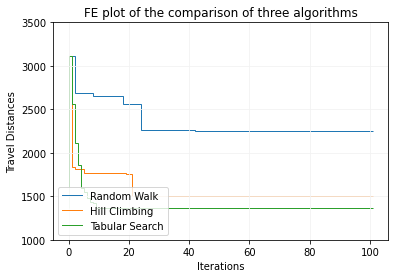

In [347]:
import matplotlib.pyplot as plt
plt.stairs(RW, label='Random Walk', baseline=RW[100])
plt.stairs(HC, label='Hill Climbing', baseline=HC[100])
plt.stairs(TS, label='Tabular Search', baseline=TS[100])


plt.xlabel('Iterations')
plt.ylabel('Travel Distances')
plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plt.ylim(1000, 3500)
plt.grid(axis='both', color='0.95')

plt.legend()

plt.show()